In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.14.3
Pandas: 0.23.0
Matplotlib: 2.2.2
Seaborn: 0.8.1
Scipy: 1.1.0
Sklearn: 0.19.1


In [2]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset (.csv file) using pandas
data = pd.read_csv('creditcard.csv')

In [4]:
#columns in the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
#Shape and description of the dataset
data = data.sample(frac=0.1)
print(data.shape)
print(data.describe())


(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94618.143780      0.006829     -0.003156      0.012359      0.005168   
std     47664.467708      1.930568      1.653706      1.494519      1.416640   
min        18.000000    -35.698345    -50.383269    -30.558697     -5.600607   
25%     53905.000000     -0.917414     -0.607503     -0.895168     -0.847597   
50%     84488.000000      0.013261      0.067089      0.192287     -0.011646   
75%    139536.000000      1.314063      0.805821      1.039782      0.753528   
max    172784.000000      2.396045     16.697832      3.937048     11.885313   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.008423     -0.007996      0.006613     -0.009156     -0.010582   
std        1.329673      1.306

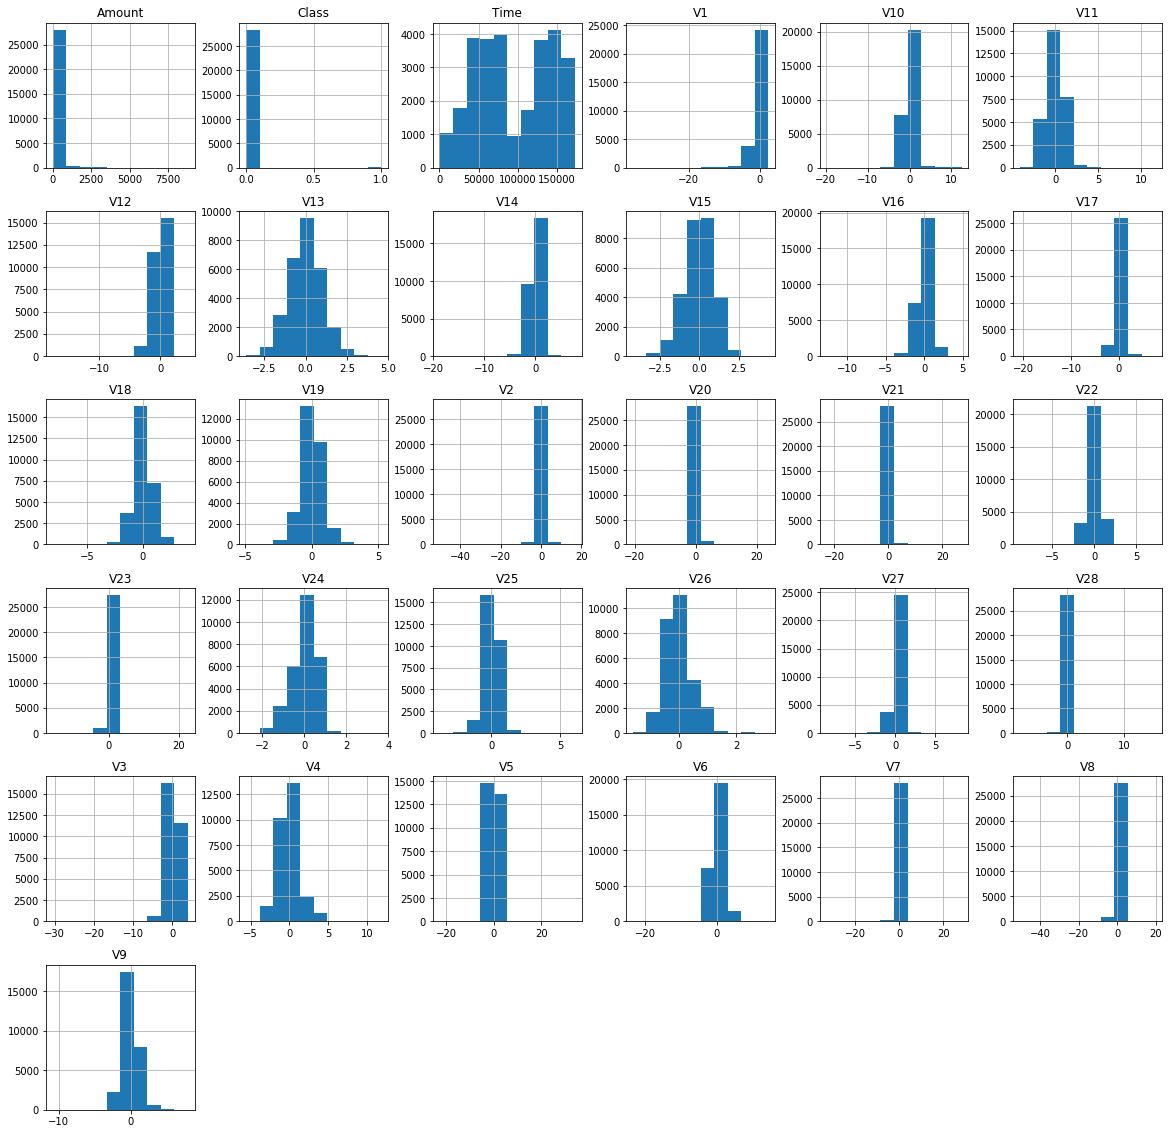

In [6]:
#Plotting histogram for all parameters
data.hist(figsize = (20, 20))
plt.show()

In [8]:
#Determining No.of fraud cases and valid cases
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
print(Fraud['Time'])

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

42784      41243.0
75511      56098.0
69498      53451.0
9035       12597.0
233258    147501.0
154286    101051.0
106998     70229.0
9509       14152.0
208651    137211.0
9252       13323.0
191074    129095.0
204079    135102.0
252124    155662.0
57248      47826.0
144754     86376.0
6529        7891.0
215953    140293.0
79874      58217.0
241445    151029.0
102446     68207.0
244004    152165.0
101509     67857.0
11841      20332.0
150715     93965.0
69980      53658.0
12108      21046.0
154234    100924.0
42958      41313.0
6331        7526.0
149600     91554.0
27738      34684.0
18809      29785.0
142405     84694.0
128479     78725.0
184379    126219.0
41569      40742.0
105178     69394.0
40085      40086.0
8615       11629.0
17453      28726.0
68320      52934.0
96341      65728.0
212644    138942.0
Name: Time, dtype: float64
0.001512061326394261
Fraud Cases: 43
Valid Transactions: 28438


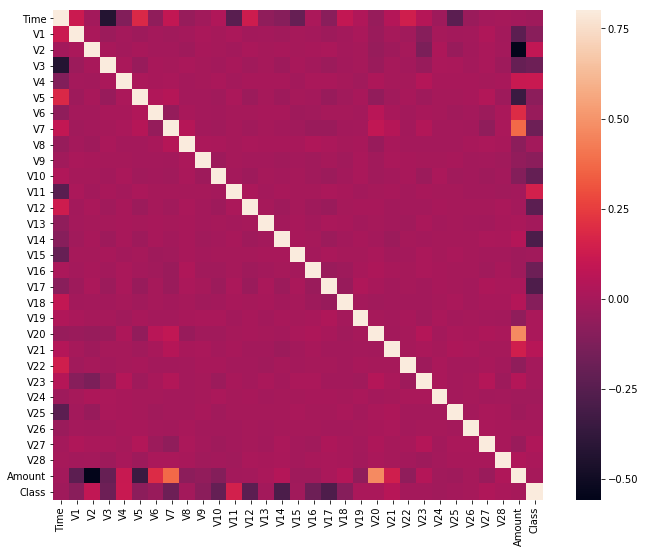

In [9]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [11]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)


(28481, 30)


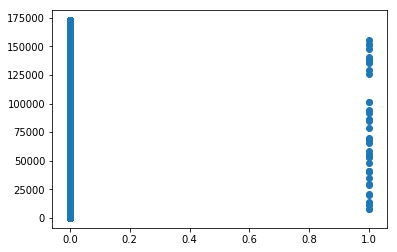

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(data['Class'],data['Time']) 
plt.show()

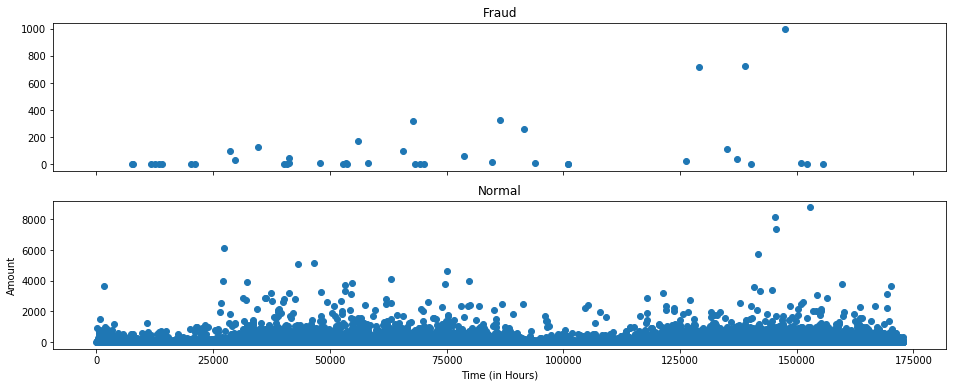

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.scatter(data["Time"][data["Class"] == 1], data["Amount"][data["Class"]  == 1])
ax1.set_title('Fraud')

ax2.scatter(data["Time"][data["Class"] == 0], data["Amount"][data["Class"] == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [17]:
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 61
0.9978582212703205
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28438
          1       0.30      0.30      0.30        43

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor: 87
0.9969453319757031
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28438
          1       0.00      0.00      0.00        43

avg / total       1.00      1.00      1.00     28481



<Figure size 648x504 with 0 Axes>